Importation of liraries

In [66]:
import numpy as np
import matplotlib.pyplot as plt

DATA Preparation

In [67]:
# data (xs as inputs and ys as outputs)

xs = np.array([[-1.0,  0.0, 1.0, 2.0, 3.0, 4.0]])
ys = np.array([[-3.0, -1.0, 1.0, 3.0, 5.0, 7.0]])
print(xs.shape)
print(ys.shape)

(1, 6)
(1, 6)


1- Initialisation of parameters W and b

In [68]:
def initialisation(x):
    #Create a random value of W and b
    W = np.random.randn(1,x.shape[0])
    #first parametre as number of input neurons and the 2nd the number of input features
    b = np.random.randn(1,1)
    #first parametre as number of input neurons and the 2nd is only 1
    parameter ={
        'W':W,
        'b':b
    }
    return parameter

2- FORWARD PROPAGATION:

Y=X.W + b

In [69]:
def forward_propagation(x,parameter):
    W= parameter['W']
    b= parameter['b']
    y = W.dot(x) + b
    return y

3- Loss Function (MSE):

MSE = 1/N × ∑ (y-ý)²

In [70]:
def mse(y_real,y_predict):
    n= y_real.shape[1]
    #error= y_real - y_predict
    #square = error **2
    #sum = np.sum(square)
    #mse_val = 1/n * sum
    return (1/n) * np.sum(np.square(y_real - y_predict))


4- Optimisation:

dW = -2/N × ∑ x(y-ý)

db = -2/N × ∑ (y-ý)

W = W -∝ dW

b = b -∝ db

In [71]:
def optimisation(x,y_real,y_predict,parameter, learning_rate=0.001):
    n= y_real.shape[1]
    error= y_real - y_predict
    dw = -2/n * error.dot(x.T)
    #dw = -2/n * np.sum(x * error, keepdims = True)
    db = -2/n * np.sum(error, keepdims = True)

    w= parameter['W']
    b= parameter['b']

    w = w - learning_rate * dw
    b = b - learning_rate * db

    parameter ={
        'W':w,
        'b':b
    }
    return parameter

Linear Regression Neuron

In [72]:
def neuralNetwork(x, y, n_iteration = 50):
    parameter = initialisation(x)

    loss= []
    for i in range(n_iteration):
        y_predict = forward_propagation (x, parameter)
        loss.append(mse(y, y_predict))
        parameter = optimisation(x,y,y_predict,parameter)
    #plt.plot(loss)
    return parameter

(1, 1)
()
(20,)


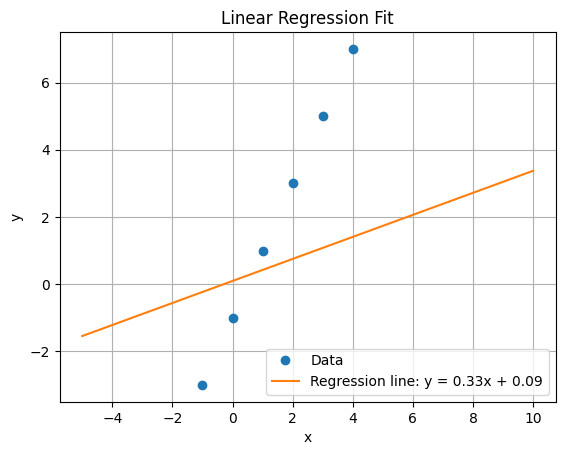

In [73]:
parameter = neuralNetwork(xs,ys)
print(parameter['W'].shape)
w = np.squeeze(parameter['W'])
b = np.squeeze(parameter['b'])
print(w.shape)

x_0 = np.linspace(-5, 10, 20)
print(x_0.shape)
y_0= x_0*w + b

xs = xs.flatten()
ys = ys.flatten()

plt.plot(xs, ys, 'o', label='Data')
plt.plot(x_0, y_0, label=f'Regression line: y = {w:.2f}x + {b:.2f}')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.grid(True)
plt.show()
#print(forward_propagation(np.array([10]),parameter))